# **Магические методы в Python**

**Магический метод** — это служебный метод, имя которого начинается и заканчивается двойным подчеркиванием.

Магические методы имеют особое значение для *Python*. *Python* автоматически вызывает данные методы в ответ на определенные операции, такие как создание экземпляра, индексация последовательности, управление атрибутами и многое другое. Магические методы поддерживают основные объектно-ориентированные функции в *Python*.

В Python специальные методы также называются магическими методами или методами dunder. Этот последний термин, dunder, относится к определенному соглашению об именовании, которое Python использует для именования своих специальных методов и атрибутов. Соглашение заключается в использовании двойных начальных и конечных подчеркиваний в имени, поэтому оно выглядит так: `.__названиеМетода__()`. Двойные подчеркивания отмечают эти методы как основные для некоторых функций Python. Они помогают избежать конфликтов имен с методами и атрибутами пользователя.

**Примечание:** магические методы получили свое второе название dunder-метод из особенности наименования. Слово «dunder» является сокращением от словосочетания «Double underscore», что переводится как «двойное подчеркивание».

# **Магические методы `__str__` и `__repr__`**

У каждого объекта Python имеется собственное **строковое** и **репрезентативное** представления. Строковое представление - то, как объект отображается в консоли при использовании функций `print()` или `str()`. Репрезентативное представление - то, как объект отображается в консоли (и внутри всяких прочих внутренних Python'овских структур) при его непосредственном вызове (или при использоавнии функции `repr()`).

Для определения строкового представления объекта используется магический метод `__str__`. Данный метод имеется у всех объектов и автоматически вызывается, когда объект передается в качестве аргумента функциям `str()`, `format()` или `print()`. Также его можно вызвыть и явно. Так как `__str__` - метод экземпляра, он должен иметь параметр `self`. Кроме того, он **должен обязательно возвращать строковое значение**, иначе возникнет исключение.

Для опеределения репрезентативного представления объекта в виде строки используется магический метод `__repr__`. Его реализация обычно похожа на реализацию `__str__`, метод также **должен обязательно возвращать строковое значение**.

Если в классе будет реализован только `__repr__`, то строковое представление будет подтягиваться из него. Если не реализованы оба метода, то в обоих случаях используется представление формата `<__main__.Класс object at 0xАдрес>`.

In [ ]:
# пример строкового и репрезентативного представлений объекта
class User:
    def __init__(self, first_name, last_name):
        self.first_name = first_name
        self.last_name = last_name

    def __str__(self):
        return f'Пользователь {self.first_name} {self.last_name}'
    
    def __repr__(self):
        return f'Representative {self.last_name}'


user = User('John', 'Doe')
print(user)  # Пользователь John Doe
print(repr(user)) # Representative Doe

kolya = User('Nikolai', 'Abramov')
print(kolya)  # Пользователь Nikolai Abramov
print(repr(kolya)) # Representative Abramov

# **Магические методы `__len__` и `__abs__`**

**Магический метод `__len__`** определяет, как объект будет вести себя, когда его длина запрашивается с помощью функции `len()`. Для объектов, которые можно измерять или имеют концепцию длины (например, строки, списки, кортежи, множества и т.д.), метод `__len__` позволяет определить их "длину". Под длиной обычно понимается количество элементов коллекции.

Можно не вызывать напрямую функцию `len()`, а сразу обращаться к методу `__len__` по следующему шаблону:

`объект.__len__()`

При создании класса по умолчанию не присутствует поведение, позволяющее находить длину. Следовательно, при попытке передать ЭК в функцию `len` будет возникать ошибка. Реализацию подобного поведения можно осуществить при помощи метода `__len__`.

**Важно:** метод `__len__` должен обязательно возвращать целое положительное число, иначе будет исключение.

**Магический метод __abs__** позволяет получить абсолютное значение объекта (у чисел - модуль), запрошенное при помощи функции `abs()`. Как и в случае с `__len__`, реализация у класса по умолчанию отсутствует.

In [ ]:
# пример использования метода __len__
class User:
    def __init__(self, first_name, last_name):
        self.first_name = first_name
        self.last_name = last_name

    def __len__(self):
        return len(self.first_name + self.last_name)
    

user = User('Valdemar', 'Riss')
print(len(user)) # 12

In [ ]:
# пример использования методов __len__ и __abs__ (для нахождения расстояния между двумя точками отрезка)
class Distance:
    def __init__(self, point1, point2):
        self.point1 = point1
        self.point2 = point2

    def __len__(self): 
        return abs(self) # без встроенной реализации модуля вернёт ошибку в случае, если разница точек отрицательная
    # можно реализовать и проще - сразу abs(self.point1 - self.point2)
    
    def __abs__(self):
        return abs(self.point1 - self.point2)


otrezok = Distance(5, 7)
print(len(otrezok)) # 2

# **Магические методы для математических операций**

Магические методы для основных математических операций: `__add__` (сложение), `__mul__` (умножение), `__sub__` (вычитание), `__truediv__` (деление). Любой класс по умолчанию не имеет реализации методов для математических операций. Логика реализации всех методов совпадает.

Любая математическая операция - *бинарная* операция. Бинарная операция обозначает, что она должна обязательно выполняться над двумя операндами: первый операнд стоит слева от знака операции, второй - справа.

*Python* автоматически вызывает магический метод при математической операции для ЛЕВОГО объекта (A+B = `A.__add__(B)`). Если у левого объекта не реализована такая операция и вызывается исключение, то он пытается применить метод `__radd__` (`__rmul__`, `__rsub__`, `__rtruediv__`) к правому объекту (B+A = `B.__radd__(A)`). Поэтому на случай, если при реализации математических операций ожидается произвольный порядок объектов, нужно реализовывать методы и для обычной, и для "реверсированной" операции.

Помимо основных математических операций, в *Python* существует большое множество прочих. Каждый из них имеет свой "реверсированный" аналог с приставкой "r".

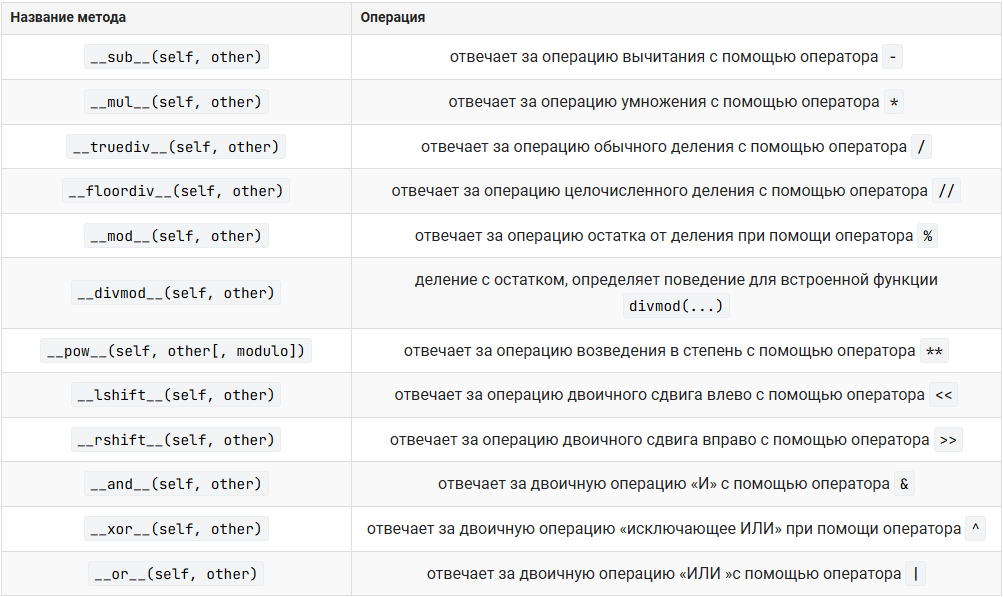

In [ ]:
# пример реализации обычной и "реверсированной" математических операций
class BankAccount:
    def __init__(self, name, balance):
        self.name = name
        self.balance = balance

    def __add__(self, other):
        if isinstance(other, BankAccount): # сложение балансов двух ЭК
            return self.balance + other.balance
        if isinstance(other, (int, float)): # прибавление числа к имеющемуся ЭК
            return self.balance + other
        raise NotImplemented
    
    def __radd__(self, other): # просто запускает метод __add__ для переданных аргументов
        return self.balance + other
    

ivan = BankAccount('Ivan', 100)
print(ivan + 20) # 120
print(25 + ivan) # 125

# **Магические методы для операций сравнения**

Магические методы для операций сравнения:

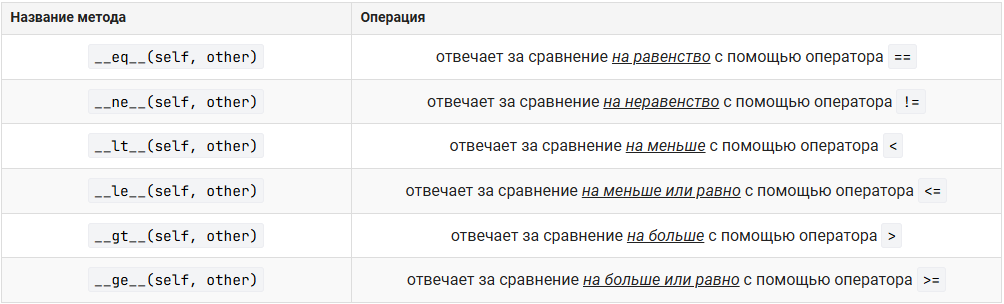

По умолчанию классы не поддерживают операции сравнения, их поведение нужно реализовывать отдельно. Исключение - равенство и неравенство (по умолчанию сравниваются адреса ячеек памяти).

Логика реализации операций сравнения в *Python* схожа с логикой реализации математических операций. Сначала проверяется возможность операции с ЛЕВЫМ операндом, если она отсутствует (`A>B = A.__gt__(B)`), то проверяется возможность "реверсивной" операции с правым операндом (`B<A = B.__lt__(A)`). Поэтому в случае, если предполагается произвольная расстановка операндов при сравнении, нужно реализовывать оба метода.

**Примечание:** если сравниваются два ЭК (а не ЭК и число, к примеру), то не обязательно реализовывать `__ne__`, `__gt__` и `__ge__` (при условии реализации `__eq__`, `__lt__` и `__le__`), т.к. при сравнении в данном случае автоматически запустятся "реверсивные" операции, а реверсивными операциями будут сравнения на равенство, меньше и меньше или равно.

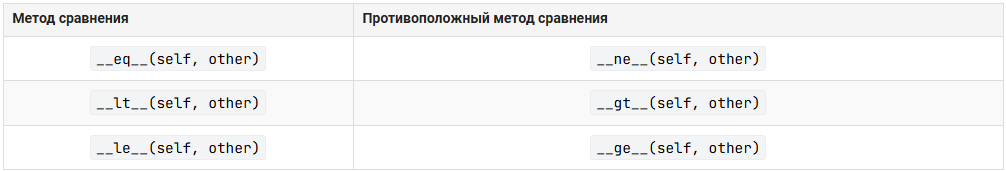

In [ ]:
# пример реализации операций сравнения на примере прямоугольников
class Rectangle:
    def __init__(self, a, b):
        self.a = a
        self.b = b

    @property
    def area(self):
        return self.a * self.b

    def __eq__(self, other): # проверка на равенство (равны стороны - равны прямоугольники)
        if isinstance(other, Rectangle):
            return self.a == other.a and self.b == other.b

    def __lt__(self, other): # сравнение площадей
        if isinstance(other, Rectangle):
            return self.area < other.area
        elif isinstance(other, (int, float)):
            return self.area < other

    def __le__(self, other): # сравнение площадей
        return self == other or self < other
    

r = Rectangle(4, 5)
d = Rectangle(2, 4)
w = Rectangle(4, 5)
print(r <= d) # False
print(r >= w) # True
print(r == w) # True
print(r != w) # False
print(r > w) # False
print(r < d) # False
# имея реализацию трёх определённых методов, можно выполнять операции при помощи всех шести операторов

In [ ]:
# использование специфического декоратора позволяет реализовывать все магические методы сравнения при помощи двух - __eq__ и __lt__
from functools import total_ordering

@total_ordering
class Rectangle:
    def __init__(self, a, b):
        self.a = a
        self.b = b

    @property
    def area(self):
        return self.a * self.b

    def __eq__(self, other): # проверка на равенство (равны стороны - равны прямоугольники)
        if isinstance(other, Rectangle):
            return self.a == other.a and self.b == other.b

    def __lt__(self, other): # сравнение площадей
        if isinstance(other, Rectangle):
            return self.area < other.area
        elif isinstance(other, (int, float)):
            return self.area < other
        

r = Rectangle(4, 5)
d = Rectangle(2, 4)
w = Rectangle(4, 5)
print(r <= d) # False
print(r >= w) # True
print(r == w) # True
print(r != w) # False
print(r > w) # False
print(r < d) # False

# **Хеш-функция. Магический метод `__hash__`**

**Хеш-функция** (или функция хеширования) - это математическая функция, которая преобразует входные данные (такие как строки, числа, байтовые последовательности) в фиксированный размерный выход, который представляет собой хеш-значение (или хеш-код). Главной целью хеш-функции является преобразование произвольного объема данных в численное значение фиксированной длины.

Хеш-значение может быть использовано для оптимизации операций поиска и сравнения, так как сравнивать числа (хеши) гораздо быстрее, чем сравнивать длинные строки или сложные структуры данных.

В *Python* имеется встроенная функция `hash()`, которая умеет вычислять хэш-значение (или хэш-код) объекта. Хэш-значение представляет собой целочисленное значение, которое вычисляется на основе содержания объекта.

**Особенности вычисления хеш-значения при помощи функции `hash():`**
* Объекты, для которых можно вызвать функцию `hash()`, должны быть неизменяемыми. Это означает, что их значение не может измениться после создания. Строки, числа и кортежи - это примеры неизменяемых объектов. Списки и словари изменяемы и не могут быть хэшированы.
* Если объект не изменяется, то его хэш-значение будет всегда одинаковым в рамках одной сессии выполнения *Python*. Это гарантирует, что объекты с одинаковым содержанием будут иметь одинаковое хэш-значение.
* Важно помнить, что хэш-значение не является уникальным для каждого объекта. Два разных объекта могут иметь одинаковое хэш-значение (коллизию), но если они равны (по сравнению через ==), то их хэш-значения также должны быть равными.

Объекты, которые поддерживают хеширование, могут использоваться в качестве ключей словаря и элементов множества.

В классах по умолчанию реализован метод хеширования (их можно передавать на вход функции `hash()`). Как-то модифицировать процесс хеширования можно при помощи магического метода `__hash__`.

**Важно:** если опререлить метод `__eq__`, то возможность по умолчанию находить хеш у ЭК пропадёт. Для её появления надо вручную реализовать функционал при помощи магического метода `__hash__`.

In [ ]:
# хэширование строк
print(hash("Hello, World!")) # -4053562152839673213

# хэширование чисел
print(hash(42)) # 42

# хэширование кортежа
print(hash((1, 2, 3))) # 529344067295497451

# хеширование ЭК
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __eq__(self, other):
        return isinstance(other, Point) and \
               self.x == other.x and self.y == other.y

    def __hash__(self):
        return hash((self.x, self.y))


p1 = Point(2, 3)

print(hash(p1)) # 8409376899596376432

# **Магический метод `__bool__`**

Все объекты в *Python* могут проходить проверку на правдивость. Под этим обычно подразумевается их способность быть интерпретированными как логическое значение: `True` или `False`. Такая интерпретация может использоваться явным образом или неявным.

Пример явного определения правдивости объекта используется в момент преобразования к булеву значению при помощи вызова `bool()`. Любое непустое значение преобразуется к значению `True`, пустые значения (и `None`) — к `False`.

Неявное определение правдивости происходит при использовании некоторых ключевых слов *Python*, цель которых создать условие в коде программы. Самыми очевидными примерами таких ключевых слов являются `if` и `while` (см. пример).

Любой ЭК всегда по умолчанию считается правдивым и преобразовываеся при помощи `bool()` к значению `True`. Задавать отдельную логику работы можно при помощи магического метода `__bool__`. Важно, чтобы возвращаемое методом значение было логическим.

**Примечание:** Единственный нюанс с преобразованием ЭК в логическое значение - если в классе реализован метод `__len__`. Тогда функция `bool()` будет вызывать метод проверки длины и в случае, если возвращаемое `__len__` значение равно 0, `bool()` вернёт `False`.

In [ ]:
# пример реализации метода __bool__
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __bool__(self): # ложное только, если координаты точки (0, 0)
        return self.x != 0 or self.y != 0

    def __str__(self):
        return f"Point({self.x},{self.y})"


p1 = Point(0, 0)
if p1: # неявный вызов
    print(f'{p1} - непустая точка')
else:
    print(f'{p1} - пустая точка') # Point(0,0) - непустая точка

p2 = Point(1, 0) # явный вызов
print(bool(p2)) # True

# **Магический метод `__call__`**

По умолчанию экземпляры классов являются невызываемыми объектами. Для того, чтобы реализовать функционал вызова ЭК, нужно использовать магический метод `__call__`, который отвечает за поведение объекта в моменте, когда к нему применяется оператор вызова `()`.

В магическом методе `__call__` можно определять любые типы параметров, что позволяет передавать значения в аргументы в момент вызова экземпляра класса в том числе при помощи `*args` и `**kwargs`.

Среди ситуаций, в которых полезно использовать класс с реализованным методом `__call__`, можно выделить следующие:
1. *Замена функции, которой необходимо хранить состояние своих вызовов.* Иногдп требуется написать вызываемые объекты, которые бы сохраняли состояние между вызовами. Можно реализовать замыкание через функцию, можно - класс с вызываемыми ЭК. Второе - проще для отладки и понимания.
2. *Предоставление функционала класса через экземпляр.* Подходит для классов, единственная цель которых - предоставить одно действие или поведение.
3. *Замена функции-декоратора классом-декоратором.* Иногда бывает проще для отладки и понимания.

In [ ]:
# пример реализации класса, который хранит состояние вызовов, вместо функции
def accumulate_average():
    data = []

    def get_average(new_value):
        data.append(new_value)
        return sum(data) / len(data)

    return get_average

avg = accumulate_average()
print(avg(10))  # 10.0
print(avg(20))  # 15.0
print(avg(30))  # 20.0


# абсолютно идентичный функционал функции выше
class AverageAccumulator:
    def __init__(self):
        self.data = []

    def __call__(self, new_value):
        self.data.append(new_value)
        return sum(self.data) / len(self.data)


avg = AverageAccumulator()
print(avg(10))  # 10.0
print(avg(20))  # 15.0
print(avg(30))  # 20.0

In [ ]:
# пример класса-декоратора
from time import perf_counter


class Timer:
    def __init__(self, func):
        self.fn = func

    def __call__(self, *args, **kwargs):
        start = perf_counter()
        print(f"Вызывается функция {self.fn.__name__}")
        self.fn(*args, **kwargs)
        finish = perf_counter()
        print(f"Функция {self.fn.__name__} отработала за {finish - start}")


@Timer # можно документировать как calculated_by_dennis = Timer(calculated_by_dennis)
def calculated_by_dennis(n):
    print(sum(range(1, n+1)))

calculated_by_dennis(10)
# Вызывается функция calculated_by_dennis
# 55
# Функция calculated_by_dennis отработала за 0.00011980021372437477

# **Полиморфизм в Python**

У **полиморфизма** есть два определения:

1. **Полиморфизм** - возможность объектов разных классов использовать один и тот же интерфейс (то есть методы с одинаковым названием), но при этом реализовывать их по-разному.
2. Определение создателя языка С++ Бьёрна Страуструпа: **Полиморфизм**  - это переписывание в дочернем классе родительского метода с целью изменить его функциональность, не меняя его названия. Таким образом у разных ЭК функция с одним и тем же именем может выполнять совершенно разные действия.

**Примеры полиморфизма:**
1. *Полиморфизм в операциях.* К примеру, оператор `+` можно использовать для выполнения разных операций с разными типами данных - списками, строками, числами.
2. *Полиморфные функции.* В Python есть некоторые функции, которые могут принимать аргументы разных типов и как-то обрабатывать их. К примеру, `len()`.
3. *Полиморфизм в методах класса*. При необходимости обработки ЭК разных классов, одинаковые названия методов позволяют обрабатывать их одновременно (скажем, через цикл).

**Утиная типизация.**  В Python есть возможность поместить в одну коллекцию объекты разных типов данных и обработать их так, как будто бы они одного вида. К примеру, поместить в коллекцию разные составные объекты, и найти через цикл их длину. Такой прием обработки объектов разных типов данных в программировании называется утиной типизацией. Он описывается следующей фразой: "*Если что-то выглядит как утка, плавает как утка и крякает как утка, то, скорее всего, это утка.*"

In [ ]:
# пример полиморфизма в методах класса
class Cat:
    def __init__(self, name):
        self.name = name

    def info(self):
        print(f"I am a cat. My name is {self.name}.")

    def make_sound(self):
        print("Meow")


class Dog:
    def __init__(self, name):
        self.name = name

    def info(self):
        print(f"I am a dog. My name is {self.name}.")

    def make_sound(self):
        print("Bark")


cat_obj = Cat("Ren")
dog_obj = Dog("Stimpy")

for animal in (cat_obj, dog_obj):
    animal.make_sound()
    animal.info()
    animal.make_sound()

# Meow
# I am a cat. My name is Ren.
# Meow
# Bark
# I am a dog. My name is Stimpy.
# Bark    

# **Операция индексации. Методы `__getitem__`, `__setitem__` и `__delitem__`**

Обращение по индексу (или по ключу) - характерная операция для упорядоченных коллекций. Классы по умолчанию работать с индексами не умеют. Для реализации стандартных операций, вроде получения, замены или удаления элемента по индексу, нужно использовать методы `__getitem__`, `__setitem__` и `__delitem__` соответственно.

Магический метод `__getitem__` используется для определения поведения объекта в случае его участия в операции обращения по индексу или по ключу. Он автоматически сработает, если обратиться к ЭК (где фунционал обращения по индексу реализован) по индексу `obj[index]` или ключу `obj[key]`.

За установку значения через индекс или ключ через присваивание отвечает магический метод `__setitem__`. Метод принимает на вход три аргумента: `self`, индекс и присваиваемое значение. Присваивание имеет следующий синтаксис: `obj[index] = new_value` или `obj[key] = new_value`

За удаление значения по индексу или ключу отвечает магический метод `__delitem__`. Метод принимает на вход два аргумент - `self` и значение индекса/ключа. Удаление будет производиться при запросах `del obj[index]` или `del obj[key]`.

**Примечание:** Обращение `obj[index]` равнозначно вызову `obj.__getitem__(index)`. Остальные два метода производятся аналогично.

In [ ]:
# реализация методов __getitem__, __setitem__ и __delitem__
class Vector:
    def __init__(self, *args):
        self.values = list(args)

    def __repr__(self):
        return f'Vector({", ".join([str(value) for value in self.values])})'

    def __getitem__(self, item):
        if 0 <= item < len(self.values):
            return self.values[item]
        else:
            raise IndexError(f"Индекс {item} находится за пределами вектора")

    def __setitem__(self, key, value):
        if 0 <= key < len(self.values):
            self.values[key] = value
        else:
            raise IndexError(f"Индекс {key} находится за пределами вектора")

    def __delitem__(self, key):
        if 0 <= key < len(self.values):
            del self.values[key]
        else:
            raise IndexError(f"Индекс {key} находится за пределами вектора")
        

v = Vector(10, 9, 12, 7, 14)
print(v)  # Vector(10, 9, 12, 7, 14)
del v[1]
v[0] = 322
print(v) # Vector(322, 12, 7, 14)
print(v[3]) # 14

# **Остальные магические методы**

В таблице ниже представлен краткий обзор всех магических методов с примечанием, изучались ли они на данный момент в курсе.

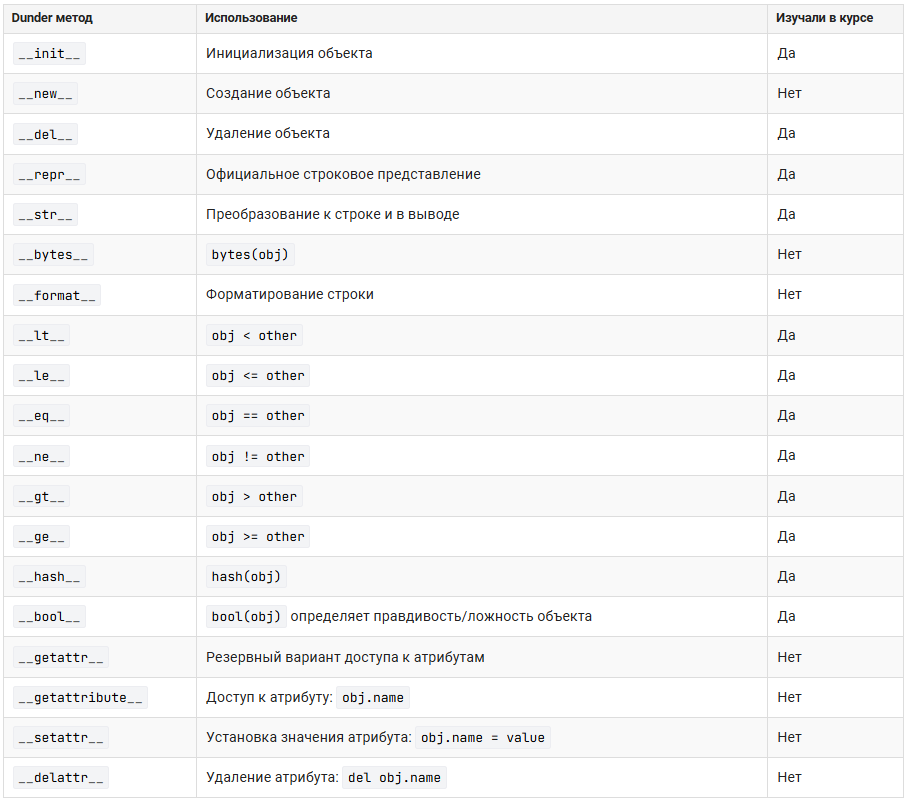

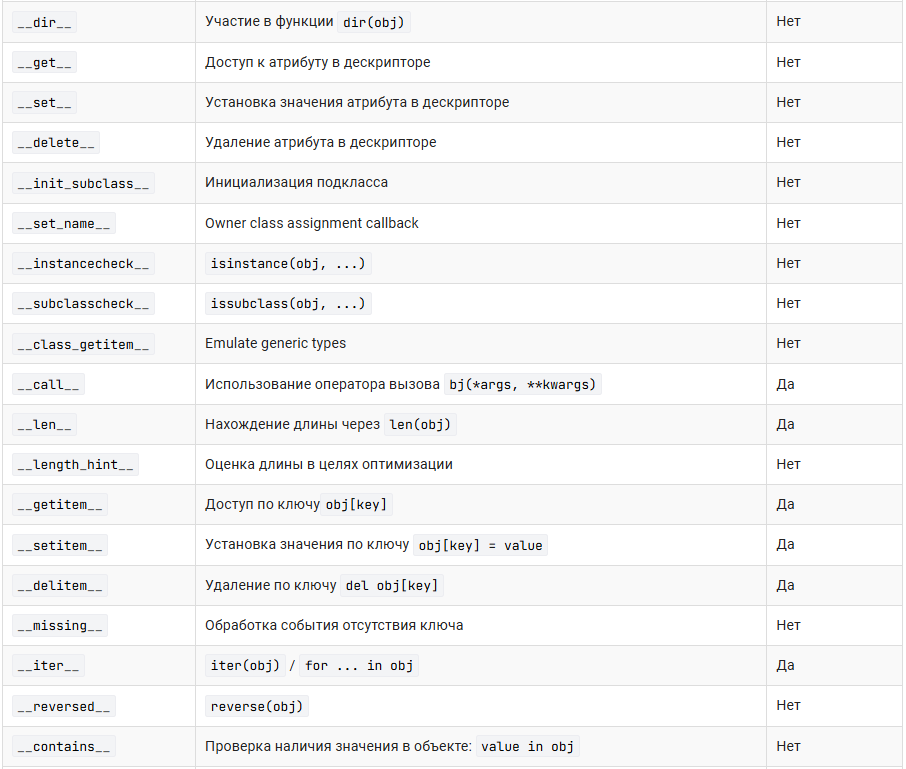

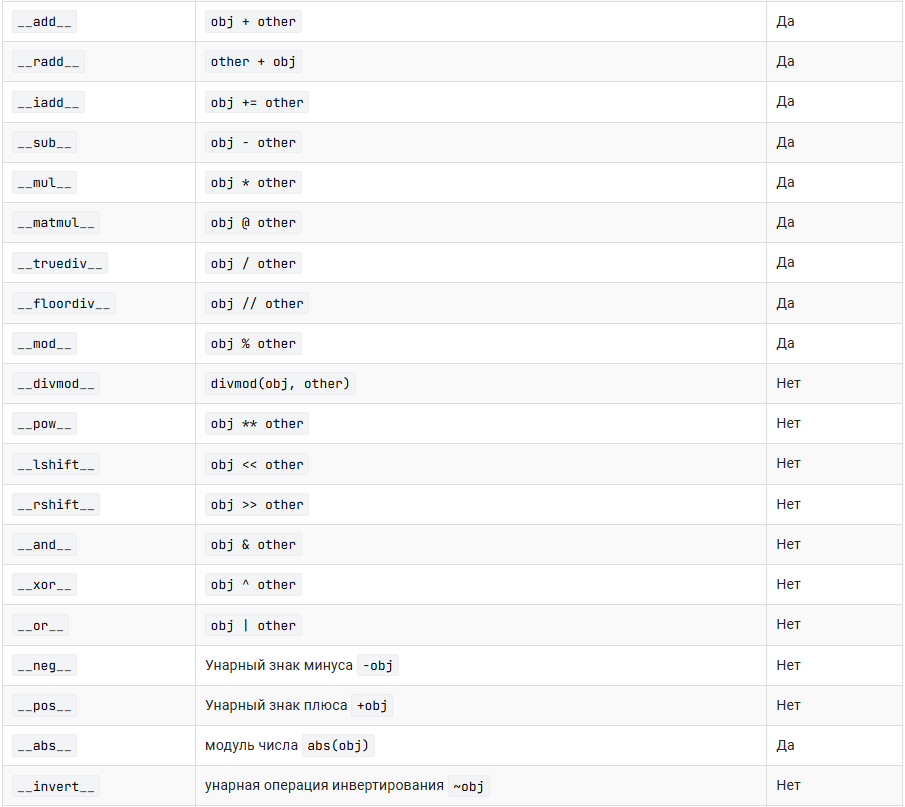

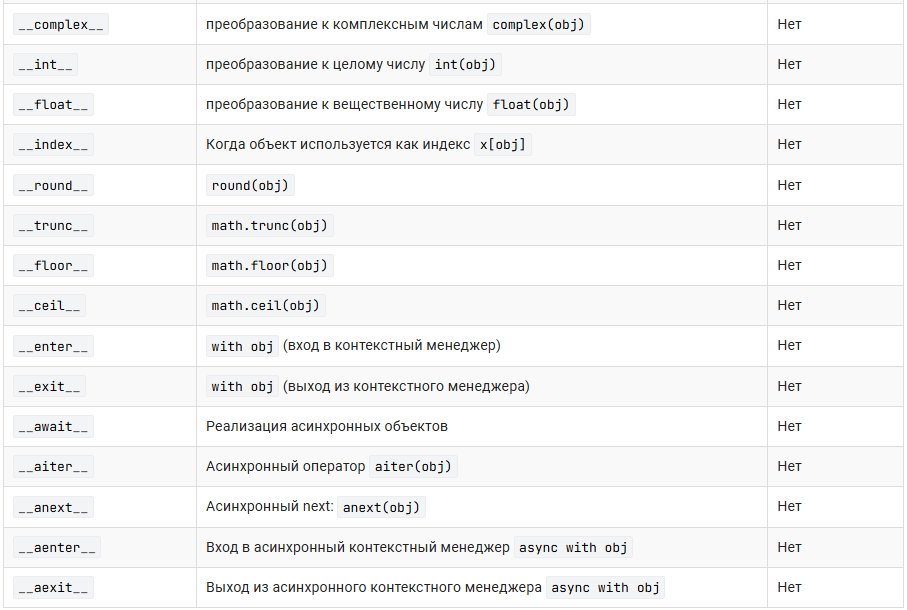

**Примечание:** методы, начинающиеся с 'a', относятся к *асинхронному программированию*.

## **Методы составного присваивания**

**Составное присваивание** - это операция в программировании, которая позволяет одновременно выполнять операцию присваивания с какой-либо другой бинарной операцией. 

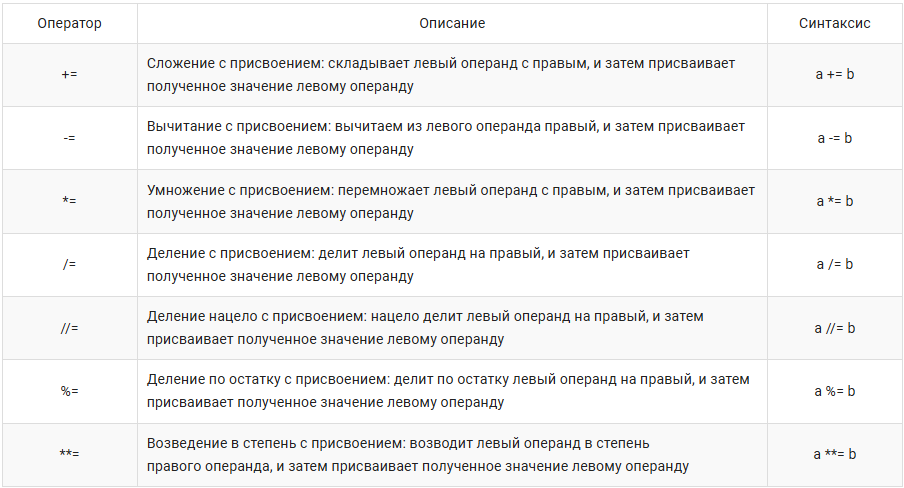

Если реализовать методы `__add__` и `__radd__`, то операция `+=` будет работать корректно, но сохранять в переменную число, а не ЭК (см. пример). Если нужно взаимодействовать таким образом с ЭК, необходимо использовать специфические магические методы, особенностью которых является буква 'i' в начале названия. `b += a` эквивалентно `b.__iadd__(a)`.

При операции `+=` python сперва попытается вызвать метод `__iadd__` у объекта. Если метод `__iadd__`  у объекта имеется, значит вызывается он. Если метод `__iadd__` не реализован, то будет вызван метод `__add__` для выполнения сложения, а затем результат будет присвоен переменной слева от `+=`.

Можно реализовывать изменяемые и неизменяемые объекты. В случае неизменяемых метод будет возвращать новый объект, в случае изменяемых - менять существующий атрибут.

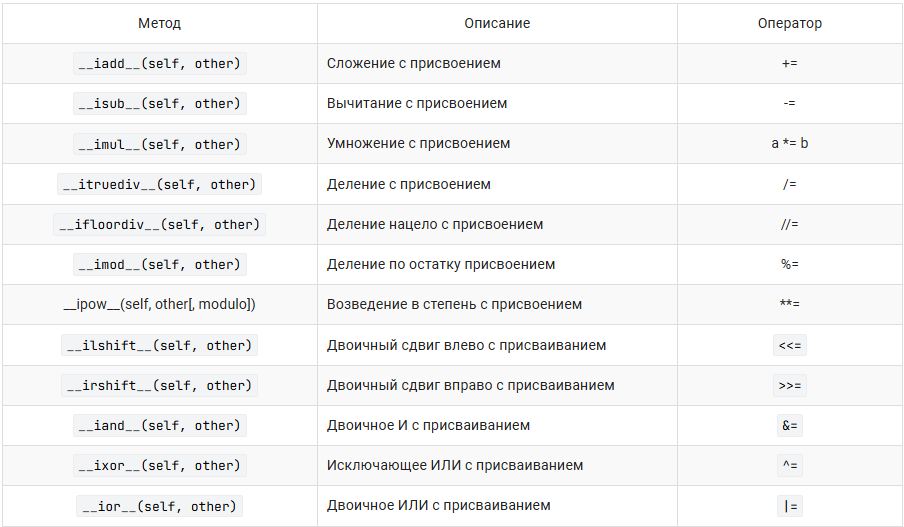

In [ ]:
# пример составного присваивания, если реализованы методы __add__/__radd__
class BankAccount:
    def __init__(self, name, balance):
        self.name = name
        self.balance = balance

    def __add__(self, other):
        if isinstance(other, (int, float)):
            return self.balance + other
        raise NotImplemented

    def __radd__(self, other):
        return self + other


b = BankAccount('vanya', 100)
b += 150
print(b, type(b)) # 250 <class 'int'>

In [ ]:
# пример составного присваивания с изменяемым объектом
class BankAccount:
    def __init__(self, name, balance):
        self.name = name
        self.balance = balance

    def __add__(self, other):
        if isinstance(other, (int, float)):
            return self.balance + other
        raise NotImplemented

    def __iadd__(self, other):
        if isinstance(other, (int, float)):
            self.balance += other
        return self


b = BankAccount('vanya', 100)
print(id(b), type(b), b.balance) # 155895520 <class '__main__.BankAccount'> 100
b += 150
print(id(b), type(b), b.balance) # 155895520 <class '__main__.BankAccount'> 250

In [ ]:
# пример составного присваивания с неизменяемым объектом
class BankAccount:
    def __init__(self, name, balance):
        self.name = name
        self.balance = balance

    def __add__(self, other):
        if isinstance(other, (int, float)):
            return self.balance + other
        raise NotImplemented

    def __iadd__(self, other):
        if isinstance(other, (int, float)):
            return BankAccount(self.name, self.balance + other)
        raise NotImplemented


b = BankAccount('vanya', 100)
print(id(b), type(b), b.balance) # 155896864 <class '__main__.BankAccount'> 100
b += 150
print(id(b), type(b), b.balance) # 153740752 <class '__main__.BankAccount'> 250

## **Метод `__contains__`**

`__contains__` — это магический метод, который позволяет проверить, присутствует ли определенное значение в объекте или нет. Метод возвращает логическое значение `True`, если элемент присутствует в последовательности и имеет значение `False` в противном случае.

Вызывается каждый раз, когда используется в операции поиска включения через оператор `in`. `item in obj` эквивалентно `object.__contains__(item)`.

Изначально ЭК не поддерживают операцию поиска включения через оператор in, её надо реализовывать отдельно при помощи магического метода `__contains__`. Он должен принимать на вход два аргумента - `self` и искомое значение.

In [ ]:
# пример реализации метода __contains__
class Student:
    def __init__(self, name, age):
        self.name = name
        self.marks = age

    def __contains__(self, item):
        return item in self.marks


john = Student("John", [5, 4, 5, 3, 4])
print(5 in john)
print(2 in john)